<a href="https://colab.research.google.com/github/rodseidel/mpca/blob/master/IA_w13_Rodrigo_Seidel_project_learning_problema2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema 2

O projeto consiste em usar classificadores para aprender a predizer se uma pessoa possui problemas cardíacos com base em um conjunto de informações sobre o paciente e sintomas. Para isso, será utilizada a base de dados Heart Disease UCI.
A base de dados é representada como um arquivo CSV no qual cada linha representa os atributos do paciente (gênero, idade, se apresenta dor no peito, pressão arterial em repouso, etc.) e o resultado da análise se o paciente possui ou não problema cardíaco (campo “target” no arquivo). Os dados da base de dados devem ser pré-processados da seguinte forma: 

1. Separar os dados em uma matriz de features (dados de entrada) e 
um vetor coluna com as classes (última coluna – “target” – do arquivo csv).
2. Normalizar a matriz de features de forma que os valores das colunas estejam no intervalo [0,1]. Essa transformação é importante para que a contribuição de todas as características seja
aproximadamente a mesma. Além disso, alguns classificadores como as redes neurais funcionam melhor com dados neste intervalo. Para cada coluna, deve-se:
* Subtrair todos os valores pelo mínimo da coluna de forma que todos os valores se tornem maiores ou iguais a zero.
* Dividir todos os valores pelo máximo da coluna (após a subtração), de forma que todos os valores fiquem entre 0 e 1.
3. Separar os dados em um conjunto de treinamento e um conjunto de avaliação (teste) do modelo treinado. Essa separação é importante porque alguns classificadores são muito bons em decorar o treinamento de forma que eles são capazes de classificar estes dados com 100% de acerto. Contudo, isso não necessariamente garante que eles vão ter a mesma precisão comdados diferentes do treinamento. Eles podem ser como aqueles alunos que decoram o
resultado de 2 maçãs mais 3 maçãs, mas não sabem somar 2 laranjas e 3 laranjas. 

Após este pré-processamento, devem ser treinados (usando o conjunto de treino) e avaliados(usando o conjunto de teste) os classificadores K-nearest neighbours (K-NN), SVM, random forest, rede neural multilayer perceptron (MLP) e gradient boosting. Os seguintes parâmetros devem ser usados para os classificadores: 

Classificador e Parâmetros
* K-NN - 5 vizinhos
* SVM - gamma = 2, C = 1
* Random Forest - max_depth=5, n_estimators=10
* MLP - hidden_layer_sizes=(32, 32), max_iter=50000, batch_size=64, alpha=1e-1
* Gradient Boosting - n_estimators=10


Para cada classificador, deve ser exibida a matriz de confusão mostrando o resultado das classificações. Além disso, devem ser criada uma tabela comparando a acurácia, precisão, recall,
tempo de treinamento, e tempo de inferência/predição dos classificadores. 

Escreva um parágrafo analisando os resultados.
Importante: É esperado que a acurácia dos classificadores esteja entre 75% e 85% de acerto.

Importante: Existem funções na biblioteca scikit-learn para realizar todas as etapas do trabalho e elas devem ser usadas.

Pontos Extras: O aluno que também utilizar o algoritmo extreme gradiente boosting (XGBoost)
receberá 2 pontos extras.


#Imports e download arquivos externos

In [ ]:
import os
import zipfile
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import sklearn.metrics
import seaborn as sns
import numpy as np
from timeit import default_timer as timer
from sklearn.metrics import classification_report

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#IMPORT DATASET
os.environ['KAGGLE_USERNAME'] = "xxxxxx" # username from the json file
os.environ['KAGGLE_KEY'] = "xxxxxx" # key from the json file
!kaggle datasets download -d ronitf/heart-disease-uci

heart-disease-uci.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#UNZIP FILE
zf = zipfile.ZipFile('heart-disease-uci.zip')
zf.extractall()

In [ ]:
#CREATES A DATAFRAME
df = pd.read_csv("heart.csv")

#Separação dos dados em matriz de features e vetor coluna com as classes target

In [ ]:
X =  df[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
Y = df[["target"]].values

#Normalização dos dados

In [ ]:
#a. Subtrair todos os valores pelo mínimo da coluna 
#* b. Dividir todos os valores pelo máximo da coluna (após a subtração)
#X_norm = (X - X.min()) / X.max()

###CORREÇÃO
X_norm = X - X.min()
X_norm = X_norm / X_norm.max()

In [ ]:
X_norm.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.441558,1.0,1.000000,0.255,0.189716,1.0,0.0,0.391089,0.0,0.370968,0.0,0.0,0.333333
1,0.103896,1.0,0.666667,0.180,0.219858,0.0,0.5,0.574257,0.0,0.564516,0.0,0.0,0.666667
2,0.155844,0.0,0.333333,0.180,0.138298,0.0,0.0,0.500000,0.0,0.225806,1.0,0.0,0.666667
3,0.350649,1.0,0.333333,0.130,0.195035,0.0,0.5,0.529703,0.0,0.129032,1.0,0.0,0.666667
4,0.363636,0.0,0.000000,0.130,0.404255,0.0,0.5,0.455446,1.0,0.096774,1.0,0.0,0.666667


#Separação train / test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.3, random_state=42)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (212, 13) (212, 1)
Test set: (91, 13) (91, 1)


#Classificadores

In [ ]:
#Preparatin to confusion matrix an others 
group_names = ["True Negative","False Positive","False Negative","True Positive"]
columns_final_report = ["Model","Accuracy","Precision","Recall","Training Time(s)","Pred Time(s)"]
final_report = []

#KNN

In [ ]:
#TRAIN
start = timer()
knn_trained = KNeighborsClassifier(n_neighbors = 5).fit(X_train,Y_train)
end = timer()

train_time_knn = end-start

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#PRED
start = timer()
Y_predKnn = knn_trained.predict(X_test)
end = timer() 

pred_time_knn = end-start

In [ ]:
#ACCURACY / PRECISION / RECALL
accuracy_knn = metrics.accuracy_score(Y_test, Y_predKnn)
precision_knn = metrics.precision_score(Y_test, Y_predKnn) 
recall_knn = metrics.recall_score(Y_test, Y_predKnn)

final_report.append(["KNN",accuracy_knn,precision_knn,recall_knn,train_time_knn,pred_time_knn])

##Classification Report

In [ ]:
print(classification_report(Y_test, Y_predKnn))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76        41
           1       0.82      0.74      0.78        50

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



##Confusion Matrix

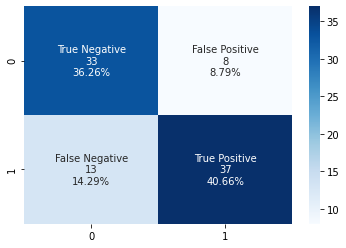

In [ ]:
#CONFUSION MATRIX
cf_matrix_knn = metrics.confusion_matrix(Y_test, Y_predKnn)

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_knn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_knn.flatten()/np.sum(cf_matrix_knn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_knn, annot=labels, fmt='', cmap='Blues')

#SVM

In [ ]:
#TRAIN
start = timer()
svm_trained = SVC(gamma=2, C=1).fit(X_train,Y_train)
end = timer()

train_time_svm = end-start

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#PRED
start = timer()
Y_predSvm = svm_trained.predict(X_test)
end = timer() 

pred_time_svm = end-start

In [ ]:
#ACCURACY / PRECISION / RECALL
accuracy_svm = metrics.accuracy_score(Y_test, Y_predSvm)
precision_svm = metrics.precision_score(Y_test, Y_predSvm) 
recall_svm = metrics.recall_score(Y_test, Y_predSvm)

final_report.append(["SVM",accuracy_svm,precision_svm,recall_svm,train_time_svm,pred_time_svm])

##Classification Report

In [ ]:
print(classification_report(Y_test, Y_predSvm))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        41
           1       0.85      0.78      0.81        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



##Confusion Matrix

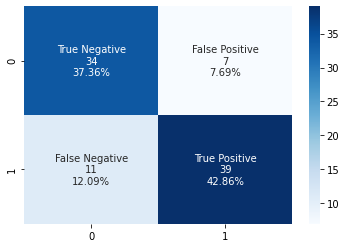

In [ ]:
#CONFUSION MATRIX
cf_matrix_svm = metrics.confusion_matrix(Y_test, Y_predSvm)

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_svm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_svm.flatten()/np.sum(cf_matrix_svm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_svm, annot=labels, fmt='', cmap='Blues')

#Random Forest

In [ ]:
#TRAIN
start = timer()
rf_trained = RandomForestClassifier(max_depth=5, n_estimators=10).fit(X_train,Y_train)
end = timer()

train_time_rf = end-start

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#PRED
start = timer()
Y_predRf = rf_trained.predict(X_test)
end = timer() 

pred_time_rf = end-start

In [ ]:
#ACCURACY / PRECISION / RECALL
accuracy_rf = metrics.accuracy_score(Y_test, Y_predRf)
precision_rf = metrics.precision_score(Y_test, Y_predRf) 
recall_rf = metrics.recall_score(Y_test, Y_predRf)

final_report.append(["Random Forest",accuracy_rf,precision_rf,recall_rf,train_time_rf,pred_time_rf])

##Classification Report

In [ ]:
print(classification_report(Y_test, Y_predRf))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



##Confusion Matrix

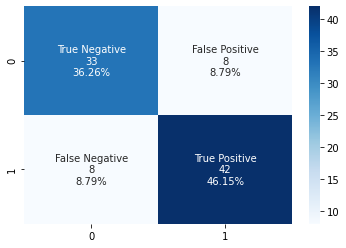

In [ ]:
#CONFUSION MATRIX
cf_matrix_rf = metrics.confusion_matrix(Y_test, Y_predRf)

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_rf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_rf.flatten()/np.sum(cf_matrix_rf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_rf, annot=labels, fmt='', cmap='Blues')

#MLP - Rede neural

In [ ]:
#TRAIN
start = timer()
mlp_trained = MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=50000, batch_size=64, alpha=1e-1).fit(X_train,Y_train)
end = timer()

train_time_mlp = end-start

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#PRED
start = timer()
Y_predMlp = mlp_trained.predict(X_test)
end = timer() 

pred_time_mlp = end-start

In [ ]:
#ACCURACY / PRECISION / RECALL
accuracy_mlp = metrics.accuracy_score(Y_test, Y_predMlp)
precision_mlp = metrics.precision_score(Y_test, Y_predMlp) 
recall_mlp = metrics.recall_score(Y_test, Y_predMlp)

final_report.append(["MLP",accuracy_mlp,precision_mlp,recall_mlp,train_time_mlp,pred_time_mlp])

##Classification Report

In [ ]:
print(classification_report(Y_test, Y_predMlp))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        41
           1       0.83      0.80      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



##Confusion Matrix

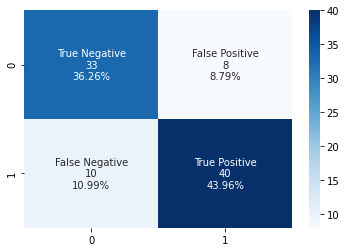

In [ ]:
#CONFUSION MATRIX
cf_matrix_mlp = metrics.confusion_matrix(Y_test, Y_predMlp)

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_mlp.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_mlp.flatten()/np.sum(cf_matrix_mlp)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_mlp, annot=labels, fmt='', cmap='Blues')

#Gradient boosting

In [ ]:
#TRAIN
start = timer()
gb_trained = GradientBoostingClassifier(n_estimators=10).fit(X_train,Y_train)
end = timer()

train_time_gb = end-start

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#PRED
start = timer()
Y_predGb = gb_trained.predict(X_test)
end = timer() 

pred_time_gb = end-start

In [ ]:
#ACCURACY / PRECISION / RECALL
accuracy_gb = metrics.accuracy_score(Y_test, Y_predGb)
precision_gb = metrics.precision_score(Y_test, Y_predGb) 
recall_gb = metrics.recall_score(Y_test, Y_predGb)

final_report.append(["Gradient Boosting",accuracy_gb,precision_gb,recall_gb,train_time_gb,pred_time_gb])

##Classification Report

In [ ]:
print(classification_report(Y_test, Y_predGb))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80        41
           1       0.84      0.82      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



##Confusion Matrix

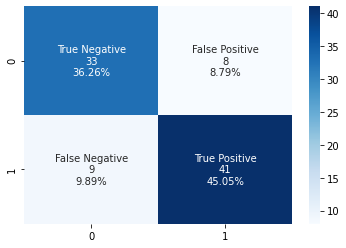

In [ ]:
#CONFUSION MATRIX
cf_matrix_gb = metrics.confusion_matrix(Y_test, Y_predGb)

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_gb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_gb.flatten()/np.sum(cf_matrix_gb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_gb, annot=labels, fmt='', cmap='Blues')

#XGBoost

In [ ]:
#TRAIN
start = timer()
xgb_trained = XGBClassifier(n_estimators=100,reg_lambda=1,gamma=0,max_depth=3).fit(X_train,Y_train)
end = timer()

train_time_xgb = end-start

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#PRED
start = timer()
Y_predXGb = xgb_trained.predict(X_test)
end = timer() 

pred_time_xgb = end-start

In [ ]:
#ACCURACY / PRECISION / RECALL
accuracy_xgb = metrics.accuracy_score(Y_test, Y_predXGb)
precision_xgb = metrics.precision_score(Y_test, Y_predXGb) 
recall_xgb = metrics.recall_score(Y_test, Y_predXGb)

final_report.append(["XGBoost",accuracy_xgb,precision_xgb,recall_xgb,train_time_xgb,pred_time_xgb])

##Classification Report

In [ ]:
print(classification_report(Y_test, Y_predXGb))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        41
           1       0.88      0.84      0.86        50

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



##Confusion Matrix

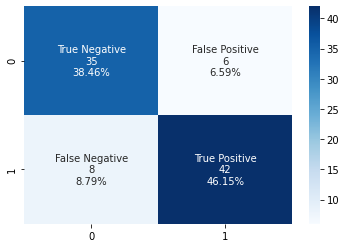

In [ ]:
#CONFUSION MATRIX
cf_matrix_xgb = metrics.confusion_matrix(Y_test, Y_predXGb)

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_xgb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_xgb.flatten()/np.sum(cf_matrix_xgb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_xgb, annot=labels, fmt='', cmap='Blues')

#Tabela comparativa modelos

In [ ]:
report = pd.DataFrame(final_report, columns=columns_final_report)
report

,Model,Accuracy,Precision,Recall,Training Time(s),Pred Time(s)
0,KNN,0.769231,0.822222,0.74,0.004613,0.009435
1,SVM,0.802198,0.847826,0.78,0.006565,0.003119
2,Random Forest,0.824176,0.840000,0.84,0.022092,0.004090
3,MLP,0.802198,0.833333,0.80,1.546870,0.002058
4,Gradient Boosting,0.813187,0.836735,0.82,0.013984,0.002228
5,XGBoost,0.846154,0.875000,0.84,0.036131,0.002830


#Parágrafos explicativos


##Conceitos

###Matriz de confusão
A matriz de confusão é uma tabela que indica os erros e acertos do seu modelo, comparando com o resultado esperado e demonstra:
* Verdadeiros Positivos: classificação correta da classe Positivo;
* Falsos Negativos (Erro Tipo II): erro em que o modelo previu a classe Negativo quando o valor real era classe Positivo;
* Falsos Positivos (Erro Tipo I): erro em que o modelo previu a classe Positivo quando o valor real era classe Negativo;
* Verdadeiros Negativos: classificação correta da classe Negativo.



###Acurácia
É uma boa indicação geral de como o modelo perfomou. Indica, dentre todas as classificações, quantas o modelo classificou corretamente, ou seja: (VP+VN)/(VP+VN+FP+FN)

###Precisão
Indica, dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas, ou seja, VP/(VP+FP). É muito importante em situações em que os Falsos Positivos são considerados mais prejudiciais que os Falsos Negativos.

###Recall
Indica, dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas, ou seja, VP/(VP+FN). É muito importante em situações em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos.

##Relatório final
O projeto consiste em usar classificadores para aprender a predizer se uma pessoa possui problemas cardíacos com base em um conjunto de informações sobre o paciente e sintomas existentes. Por conta do contexto, além da acurácia, o recall tem uma importância relevante, uma vez que a ocorrência de falsos negativos são prejudiciais para o paciente.

Conforme tabela comparativa dos modelos tivemos com pior performance o KNN e com melhor performance o XGBoost, porém observando-se recall, verifica-se Random Forest obteve performance igual a do XGBoost.

Os tempos de treino foram semelhantes entre os modelos, exceto para o MLP que o fez em aproximadamente 1,5s, tempo bem maior que os demais modelos. Já para a predição os tempos foram muito pequenos para todos os modelos, tomando apenas algums milésimos de segundo para executá-la.